# AB Testing

## 1 Loi de la proportion observée d’utilisateurs

On suppose ici que l’on a observé le comportement de n utilisateurs d’une des versions et l’on souhaite
modéliser la proportion observée chez les utilisateurs ayant eu le comportement souhaité.
On fera l’hypothèse que tous les utilisateurs se comportent de manière indépendante les uns des autres.

**T1.** On mesure le comportement d’un utilisateur par une variable $X$ qui vaut 1 si l’utilisateur a le
comportement souhaité et 0 sinon.


On a bien :
$$\mathbb{P}(X = 1) = p \quad \text{et} \quad \mathbb{P}(X = 0) = 1 - p $$

**T2.** On note $X_i$
le comportement du ième utilisateur, vérifions que : 
$$ \widehat{p}= \frac{1}{n}\sum_{i=1}^{n} X_i$$

**T3.** Montrer qu’il ne s’agit de rien d’autre que de la proportion de comportement souhaité parmi les
utilisateurs observés.

**T4.** Vérifier que :
$$ \frac{1}{n}\sum_{i=1}^{n} X_i \rightarrow p $$

**S1.** Illustrons de manière numérique ce comportement. Pour les illustrations numériques, on prendra
p = .72. On importe les bibliothèques adaptées :

In [49]:
import numpy as np
from math import sqrt
from math import exp
import numpy.random as npr
import scipy.stats as sps
import matplotlib.pyplot as plt

On peut maintenant calculer $\widehat{p}(n)$ pour $n\in{[\![1;N]\!] }$ :

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.


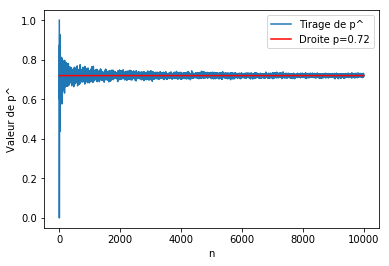

In [2]:
p=0.72
N=10000
X=sps.bernoulli(p)
P=np.array([np.sum(X.rvs(size=n))/n for n in range(N)])
plt.plot(np.arange(N),P,label='Tirage de p^')
plt.plot(np.arange(N),np.array([p]*N),color='r',label='Droite p=0.72')
plt.xlabel("n")
plt.ylabel("Valeur de p^")
plt.legend()
plt.show()

## 2 Vitesse de convergence de la proportion observée

**T5.** Vérifions que :
$$ \sqrt{n}(\widehat{p}-p) \rightarrow \mathcal{N}(0,p(1-p)) $$

**S2.** Illustrons de manière numérique ces deux convergences.

Traçons tout d'abord $\sqrt{n}(\widehat{p}-p)$

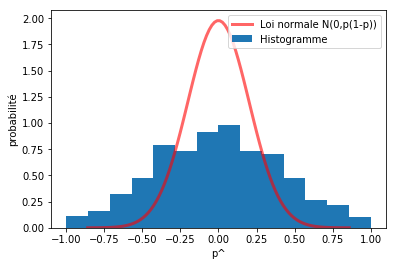

In [95]:
p=0.72
N=1000 #nombre de tirages
n=10000 #n de p(n)
#eps=0.5

X=sps.bernoulli(p)

N_loi=sps.norm(0,p*(1-p))
axeX = np.linspace(N_loi.ppf(0.00001),N_loi.ppf(0.99999), 100)
P_sqrt_n=np.array([(np.sum(X.rvs(size=n))/n - p)*sqrt(n) for k in range(N)])

plt.plot(axeX,N_loi.pdf(axeX),'r-', lw=3, alpha=0.6, label='Loi normale N(0,p(1-p))')
plt.hist(P_sqrt_n, bins=np.linspace(-1,1,int(N**0.4)), density=True, label='Histogramme')

plt.xlabel("p^")
plt.ylabel("probabilité")
plt.legend()
plt.show()

**T6.** Démontrons que :
$$\mathbb{P}(N 	\geq \epsilon) \leq e^{\frac{-\epsilon^2}{2}}
\quad \text{et} \quad
\mathbb{P}(|N| \geq \epsilon) = 2e^{\frac{-\epsilon^2}{2}} $$

**T7.** Montrons que :
$$\mathbb{P}(|\widehat{p}-p| \geq \frac{\epsilon}{\sqrt{n}}) \leq \frac{p(1-p)}{\epsilon^2}$$

**S3.** Vérification numérique :

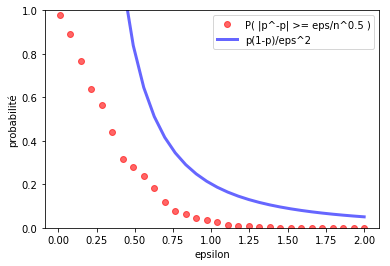

In [84]:
p=0.72
N=1000 #nombre de tirages
n=1000 #n de p(n)
eps=np.linspace(0.01,2,30) #on ne commence pas à 0 pour ne pas diviser par 0

X=sps.bernoulli(p)

P_sqrt_n=[np.array([( abs((np.sum(X.rvs(size=n))/n - p)) >= (e/sqrt(n)) ) for k in range(N)]) for e in eps]

val_proba = np.array([np.sum(P_sqrt_n[i])/N for i in range(len(eps))])
val_majorant = np.array([p*(1-p)/e**2 for e in eps]) 

plt.plot(eps,val_proba,'ro', lw=3, alpha=0.6, label='P( |p^-p| >= eps/n^0.5 )')
plt.plot(eps,val_majorant,'b', lw=3, alpha=0.6, label='p(1-p)/eps^2')

plt.xlabel("epsilon")
plt.ylabel("probabilité")
plt.ylim([0,1])
plt.legend()
plt.show()

Inégalité améliorable car pour $\epsilon \rightarrow 0$ , on a alors une probabilité majorée par une constante supérieure à 1 !

**T9.** Le théorème de Bernstein dit que si  $\text{var}(Z_i) ≤ \sigma_i^2$ alors

**S4.** Vérifions numériquement que ces comportements sont vérifiés.

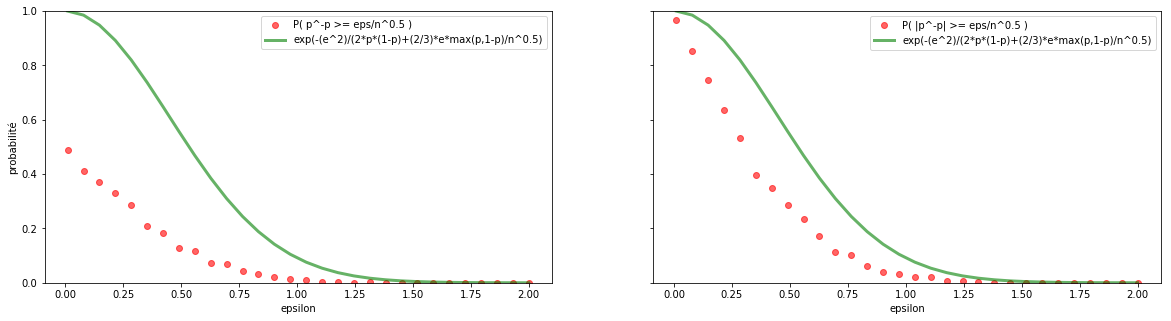

In [91]:
p=0.72
N=1000 #nombre de tirages
n=1000 #n de p(n)
eps=np.linspace(0.01,2,30) #on ne commence pas à 0 pour ne pas diviser par 0

X=sps.bernoulli(p)

val_majorant = np.array([exp(-(e**2)/(2*p*(1-p)+(2/3)*e*max(p,1-p)/sqrt(n))) for e in eps]) 

#Majoration sans la valeur absolue
P_sqrt_n_1 =[np.array([( (np.sum(X.rvs(size=n))/n - p) >= (e/sqrt(n)) ) for k in range(N)]) for e in eps]
val_proba_1 = np.array([np.sum(P_sqrt_n_1[i])/N for i in range(len(eps))])

#Majoration avec la valeur absolue
P_sqrt_n_2 =[np.array([( abs((np.sum(X.rvs(size=n))/n - p)) >= (e/sqrt(n)) ) for k in range(N)]) for e in eps]
val_proba_2 = np.array([np.sum(P_sqrt_n_2[i])/N for i in range(len(eps))])

fig, ax = plt.subplots(1,2, sharex='col', sharey='row', figsize=(20, 5))

ax[0].plot(eps,val_proba_1,'ro', lw=3, alpha=0.6, label='P( p^-p >= eps/n^0.5 )')
ax[0].plot(eps,val_majorant,'g', lw=3, alpha=0.6, label='exp(-(e^2)/(2*p*(1-p)+(2/3)*e*max(p,1-p)/n^0.5)')
ax[1].plot(eps,val_proba_2,'ro', lw=3, alpha=0.6, label='P( |p^-p| >= eps/n^0.5 )')
ax[1].plot(eps,val_majorant,'g', lw=3, alpha=0.6, label='exp(-(e^2)/(2*p*(1-p)+(2/3)*e*max(p,1-p)/n^0.5)')

ax[0].set_xlabel("epsilon")
ax[1].set_xlabel("epsilon")
ax[0].set_ylabel("probabilité")
plt.ylim([0,1])
ax[0].legend()
ax[1].legend()
plt.subplots_adjust()
plt.show()

On remarque empiriquement que cette majoration est plus précise que celle obtenue à la question **T7**.

**T10.** Quel est l’avantage pratique de l’inégalité de Hoeffding par rapport à celle de Bernstein ?

**S5.** Comparons ces inégalités avec celles obtenues via la limite gaussienne (question **T7**). On se contentera de comparer l'inégalité concernant $\mathbb{P}(|\widehat{p}-p| \geq \frac{\epsilon}{\sqrt{n}})$.

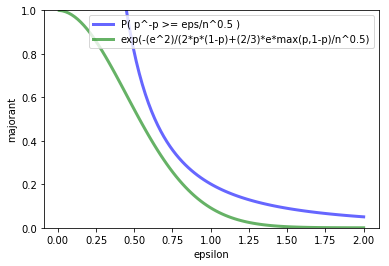

In [93]:
p=0.72
N=1000 #nombre de tirages
n=1000 #n de p(n)
eps=np.linspace(0.01,2,100) #on ne commence pas à 0 pour ne pas diviser par 0

X=sps.bernoulli(p)

val_majorant_1 = np.array([p*(1-p)/e**2 for e in eps])
val_majorant_2 = np.array([exp(-(e**2)/(2*p*(1-p)+(2/3)*e*max(p,1-p)/sqrt(n))) for e in eps]) 

plt.plot(eps,val_majorant_1,'b', lw=3, alpha=0.6, label='P( p^-p >= eps/n^0.5 )')
plt.plot(eps,val_majorant_2,'g', lw=3, alpha=0.6, label='exp(-(e^2)/(2*p*(1-p)+(2/3)*e*max(p,1-p)/n^0.5)')

plt.xlabel("epsilon")
plt.ylabel("majorant")
plt.ylim([0,1])
plt.legend()
plt.subplots_adjust()
plt.show()

**T11. (facultatif)** Démontrons ces deux théorèmes.

## 3 Comparaison entre deux proportions

Le problème originel n’est pas exactement d’estimer les proportions $p_A$ et $p_B$ des utilisateurs ayant le
comportement souhaité dans les versions $A$ et $B$ mais plutôt de voir si $p_B$ est vraiment plus grand que
$p_A$. En pratique, le risque d’un changement n’étant pas négligeable, on souhaite conserver le modèle $A$
lorsque $p_B ≤ p_A + δ$ et basculer vers $B$ dans le cas contraire.
On note $n_A$ le nombre d’utilisateurs ayant vu la version $A$ et $n_B$ celui ayant vu la version $B$ et on
propose de choisir entre les versions $A$ et $B$ de la manière suivante :

**T12.** Montrer que

**T13.** En déduire que si $p_B ≤ p_A + δ$ alors

**T14.** Vérifier que si $p_B ≤ p_A + δ$ alors la probabilité de choisir $B$ est inférieure à $γ$.

**T15.** Montrer que si

**S6.** Vérifions numériquement ces comportements.

**T16.** Supposons que l’on pense que le gain de version $B$ est supérieur de $\text{10%}$ à la version $A$.

**S7.** Implémenter une fonction donnant ce nombre en fonction des différents paramètres.